In [68]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

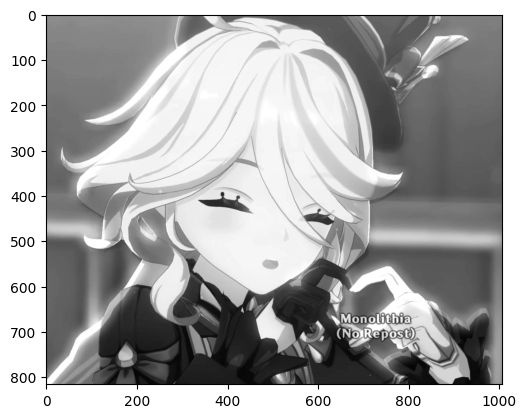

In [69]:
img = cv.imread('../furina/furina.png')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.subplot
plt.imshow(img, cmap='grey')

## Simple Thresholding

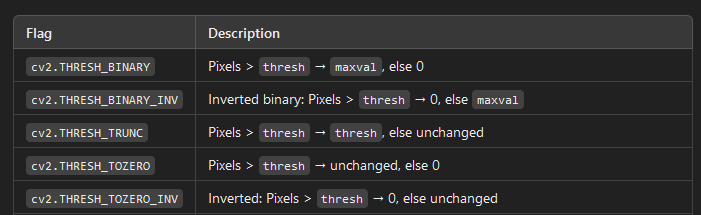

In [ ]:
cv.mean(img)

In [70]:
def threshold(img:np.ndarray, thres:int, maxval:int, type:str="THRESH_BINARY"):
    '''
        img: numpy array of the image
        thres: threshold value
        maxval: value assigned to pixels at threshold condition. (e.g. > thres or < thres)
        type: thresholding type
    '''

    img = img.copy()
    output = np.zeros_like(img, dtype=np.float32)
    
    if type == 'THRESH_BINARY':
        output[img >= thres] = maxval
        
    elif type == 'THRESH_BINARY_INV':
        output[img <= thres] = maxval

    elif type == 'THRESH_TRUNC':
        img[img >= thres] = thres
        output = img
        
    elif type == 'THRESH_TOZERO':
        img[img < thres] = 0
        output = img

    elif type == 'THRESH_TOZERO_INV':
        img[img >= thres] = 0
        output = img
        
    else:
        raise ValueError("Unsupported threshold type")
    return output
    

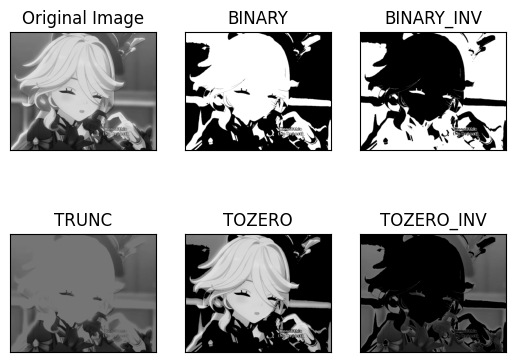

In [71]:
thresh1 = threshold(img,117,255,'THRESH_BINARY')
thresh2 = threshold(img,117,255,'THRESH_BINARY_INV')
thresh3 = threshold(img,117,255,'THRESH_TRUNC')
thresh4 = threshold(img,117,255,'THRESH_TOZERO')
thresh5 = threshold(img,117,255,'THRESH_TOZERO_INV')
 
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()

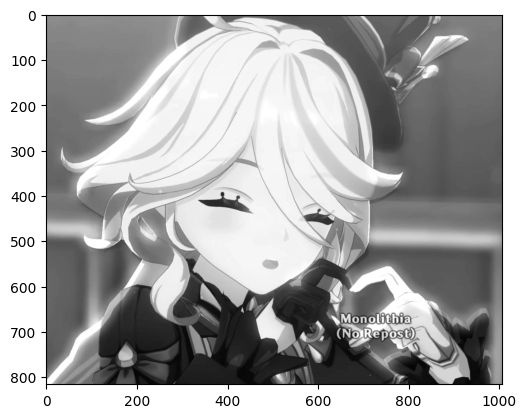

In [72]:
plt.imshow(img, cmap='gray')

In [73]:
import numpy as np

def gaussian_kernel(k, sigma=1.0):
    """
    Creates a 2D Gaussian kernel array with size k x k and standard deviation sigma.
    """
    # Ensure k is odd
    assert k % 2 == 1, "Kernel size must be odd"
    
    # Coordinate grid (centered at 0,0)
    half = k // 2
    x, y = np.meshgrid(np.arange(-half, half+1), np.arange(-half, half+1))
    
    # Compute the 2D Gaussian
    g = (1.0 / (2.0 * np.pi * sigma**2)) * np.exp(- (x**2 + y**2) / (2.0 * sigma**2))
    
    # Normalize so the sum of all elements is 1
    g /= g.sum()
    
    return g

In [74]:
def convolve(img, kernel):
    #? 1. Get image and kernel shapes
    height, width = img.shape
    k_h, k_w = kernel.shape  # e.g., (3, 3)
    
    #? 2. Pad the image
    pad_h = k_h // 2  # e.g. 3 // 2 = 1 if k_h=3
    pad_w = k_w // 2
    new_height = height + 2 * pad_h
    new_width = width + 2 * pad_w
    
    # Initialize padded image
    padded_img = np.zeros((new_height, new_width), dtype=img.dtype)
    padded_img[pad_h:pad_h+height, pad_w:pad_w+width] = img
    
    #? 3. Create output array
    # zeros_like: Return an array of zeros with the same shape and type as a given array
    filtered_img = np.zeros_like(img, dtype=np.float32)
    
    #? 4. Convolution-like operation
    for i in range(height): # rows
        for j in range(width): # cols
            # local region in padded image
            region = padded_img[i : i + k_h, j : j + k_w] # region_size == kernel_size
            
            # element-wise multiply and sum
            value = np.sum(region * kernel)
            
            # assign to output
            filtered_img[i, j] = value 
    
    return filtered_img

In [75]:
def adaptive_gaussian_threshold(img, k_size=11, sigma=2.0, C=2):
    """
        Adaptive Gaussian Thresholding from scratch.

        1. Compute local weighted mean (via Gaussian kernel convolution).
        2. Threshold each pixel:
            if img[x, y] >= (local_mean[x, y] - C): pixel -> 255 else -> 0
            
        img: 2D numpy array (grayscale)
        k_size: odd integer (window size for Gaussian kernel)
        sigma: standard deviation for Gaussian
        C: constant subtracted from the local mean
        returns: 2D binary numpy array (0 or 255)
    """
    kernel = gaussian_kernel(k_size, sigma)
    local_means = convolve(img, kernel)
    
    # define output
    output = np.zeros_like(img, dtype=np.uint8)
    
    # every value in img that >= (local_mean - C) set to 255
    output[img >= (local_means - C)] = 255 
    
    return output
    

In [76]:
threshold_img = adaptive_gaussian_threshold(img)

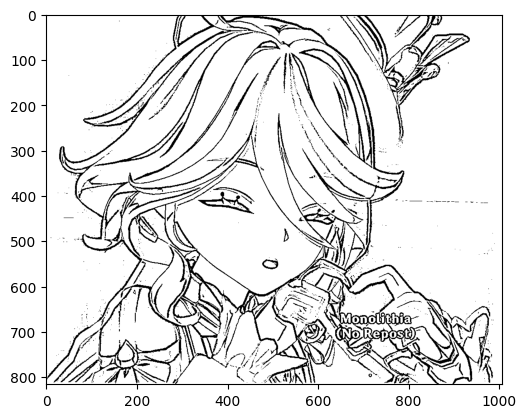

In [77]:
plt.imshow(threshold_img, cmap='gray')